# Лабораторная работа 1 
# Задача о падении тела. Построение графиков функций.

Кураленко Алексей Анатольевич 20.02.2025

# Задание 1.1. Задача о падении тела

**Описание процесса**.  
Тело запущено под углом $\alpha$ к горизонту на высоте $h_{start}$ и через 
время $t=T$ достигает другое тело, расположенное на расстоянии $s_{end}$ и 
высоте $h_{end}$.  
**Предположения**. - Тело будем считать материальной точкой массы $m$. - Движение запущенного тела осуществляется только под действием силы 
тяжести $${\bf F} = m (0,-g),$$ где $m$ — масса тела, $g$ — ускорение 
свободного падения.

**Данные.**
- Задача рассматривается при следующих значениях параметров: $h_{start}$ = 1 m, $h_{end}$ = 3 m, $T$ = 3 s, $s_{end}$ = 5 m.
- Угол запуска тела $\alpha$ не известен.
- Начальный момент времени движения тела полагаем равным нулю: $t$ = 0.
- Значение массы тела $m$ не повлияет на функции перемещения тела.

**Задания для выполнения.**
- $\color{red}\text{Определите}$ функцию перемещения тела $(s_{x}(t), s_{y}(t))$ под действием силы тяжести, где $s_{x}(t)$ и $s_{y}(t)$ — горизонтальная и вертикальная составляющая положения тела в момент времени $t$, соответственно.
- $\color{red}\text{Найдите}$ угол запуска тела $\alpha$.
- $\color{red}\text{Постройте}$ график траектории движения тела $(s_{x}(t), s_{y}(t))$ для $t \in [0, T]$. 

## Выполнение Задания 1.1 ##

### Этап 1. Импортирование модулей ###

Импортируем модуль `math` с математическими функциями из стандартной
библиотеки:

In [11]:
import math

Доступ к инструментам модуля осуществляется с применением синтаксиса
уточнения `<имя модуля>.<имя атрибута>`. Например,

In [13]:
math.sin(math.pi/2)

1.0

Импортируем расширение `numpy` и создадим псевдоним `np` для доступа к
инструментам модуля, не используя имя `numpy`

In [15]:
import numpy as np 

Расширение `numpy` основано на работе со структурой данных массив (` ndarray `).
Массив (` ndarray `) не является встроенным типом данных Python, он является
базовым типом расширения `numpy`.

Импортируем модуль `pyplot` из пакета `matplotlib` для построения графиков.
Для этого примененим синтаксис `<имя пакета>.<имя модуля в пакете>` и
создадим псевдоним имени модуля `plt`

In [17]:
import matplotlib.pyplot as plt

Импортируем модуль `constants` из пакета расширений `scipy` с псевдонимом
`const`. Модуль `constants` предоставляет доступ к значениям физических
констант

In [19]:
import scipy.constants as const

Импортируем модуль `sympy` для символьных вычислений в Python

In [21]:
import sympy

###  Этап 2. Создание переменных ###

**Переменные** создаются при первом присваивании им значений. Слева от
оператора присваивания (`=`) записывается переменная, справа — выражение,
результатом вычисления которого является объект: `переменная = объект`. Имена
переменных рекомендовано задавать в нижнем регистре с использованием знака
нижнего подчеркивания для смыслового разделения имени на части, например
`first_variable = 1`. Объявлять переменные перед их инициализацией не нужно.

После присваивания всякий раз, когда переменная появляется в коде, она
заменяется на объект, на который ссылается. Нельзя использовать переменную,
которой не присвоено значение.

In [24]:
h_start = 1 # вертикальная составляющая положения тела в момент запуска
h_end = 3.0E+0 # вертикальная составляющая положения тела в конечный момент движ
T = 3.0 # время полета
s_end = 5.0e0 # горизонтальное перемещение тела за время полета

Отобразить значение переменной можно, указав ее имя в ячейке ввода в
последней строке или с использованием встроенной функции `print`

In [26]:
h_start # переменная не отобразится
h_end # переменная отобразится

3.0

In [27]:
print(h_start, h_end)

1 3.0


Определим значение ускорения свободного падения для дальнейших расчетов:

In [29]:
g = const.g
g, const.unit('standard acceleration of gravity')

(9.80665, 'm s^-2')

$\color{red}\text{Приведите}$ несколько примеров физических констант из модуля
`constants` пакета расширений `scipy`

Примеры:

In [32]:
const.c # скорость света в м/с

299792458.0

In [33]:
const.e #элементарный заряд в кулонах

1.602176634e-19

In [34]:
const.m_e #масса электрона в килограммах

9.1093837015e-31

Временной отрезок $[0,T]$ представим в виде последовательности чисел. Cоздадим
последовательность равномерно распределенных чисел на отрезке $[0,T]$ с шагом 0.01 двумя способами: на основе встроенного типа список (`list`) и на основе
массива (`ndarray`) из расширения `numpy`

In [36]:
step = 0.01
t_list = [0 + i*step for i in range(int(T/0.01))]
t_array = np.arange(0,T,step)  

$\color{red}\text{Сформулируйте}$ спецификации функций `range` и `arange` , приведите примеры

В Python функции range и arange используются для генерации последовательностей чисел.

**range**
- встроенная функция
- генерирует последовательность целых чисел
- синтаксис: range(start, stop[, step])
по умолчанию: начальное значение -- 0, конечное значение не включается в последовательность, шаг -- 1
- пример: <br/>
  for i in range(1, 10, 2):<br/>
    print(i)   (выводит: 1, 3, 5, 7, 9)
  
**arange**

- функция из библиотеки NumPy.
- генерирует последовательности чисел (целых или с плавающей запятой).
- синтаксис: numpy.arange(start, stop[, step], dtype=None)
по умолчанию: начальное значение -- 0, конечное значение не включается в последовательность, шаг -- 1
- dtype -- тип данных выходного массива (опционально).
- пример: <br/>
import numpy as np <br/>
array = np.arange(1, 10, 2) <br/>
print(array)  (выводит: [1 3 5 7 9])

In [39]:
#?range

In [40]:
 #?np.arange

Запомните, что после создания списка (` list `) его размер изменить можно, после
создания массива (` ndarray `) его размер изменить нельзя

### Этап 3. Определение функции перемещения и нахождение угла запуска тела ###

$
s_x(t) = s_x(0) + v0_{x} t = 0 + v0_{x} t,
$

$
s_y(t) = s_y(0) + v0_{y} t - \frac{g}{2} t^2 = h_{start} + v0_{y} t - \frac{g}{2} t^2,
$

Аналитический вид для функций $s_{x}(t)$ и $s_{y}(t)$ получен так:

**для оси Ох**: на тело не действовали никакие силы вдоль этой оси, поэтому оно двигается без изменения скорости(ускорение = 0), движение равномерно

**для оси Оу**: на тело вдоль этой оси действует сила тяжести, ускорение по модулю равно ускорению свободного падения, движение равноускоренно

Из условия задачи имеем, что $s_{x}(T)=s_{end}$ . Из этого соотношения находим значение для 
$v0_{x}$

In [46]:
 v0_x = s_end/T
 v0_x 

1.6666666666666667

Из условия задачи имеем, что $s_{y}(T)=h_{end}$ . Из этого соотношения находим значение для 
$v_{0y}$

In [48]:
v0_y = (h_end-h_start+g/2*T**2)/T
v0_y

15.376641666666666

Значение угла запуска тела $\alpha$ определяем из соотношения tan$ \alpha=\frac{v_{0y}}{v_{0x}}$

In [50]:
alpha = math.atan(v0_y/v0_x)
alpha, math.degrees(alpha)

(1.462828312588189, 83.81388846354714)

Результирующая функция перемещения имеет следующий вид

In [52]:
f's_x(t) = {v0_x} t'

's_x(t) = 1.6666666666666667 t'

In [53]:
 f's_y(t) = {h_start} + {v0_y:.6} t - {g:.6}/2*t\N{superscript two}'

's_y(t) = 1 + 15.3766 t - 9.80665/2*t²'

### Этап 4. Построение графика траектории движения тела ###

Построение графиков функций осуществляется по координатам точек графика. Создадим последовательность значений $x$-координат точек графика функции и последовательность соответствующих значений $y$-координат точек
графика функции.</br> 

In [119]:
 t_list, t_array; # символ ; предотвращает вывод

 Определим списки чисел, соответствующие горизонтальным и вертикальным
 составляющим положения тела в моменты времени 
t_list с использованием
 формул, полученных на Этапе 3:

In [122]:
s_x_list = [v0_x*t for t in t_list]
s_y_list = [h_start+v0_y*t-g*t**2/2 for t in t_list]

Определим массивы чисел, соответствующие горизонтальным и вертикальным
составляющим положения тела в момент времени `t_array` :

In [57]:
 s_x_array = v0_x*t_array
 s_y_array = h_start+v0_y*t_array-g*t_array**2/2

Строим график траектории движения тела, используя инструменты модуля `pyplot`
пакета
 `matplotlib` . Смотрите **Help | Matplotlib Reference** для справочной
 информации по используемым функциям: 
`figure , 
plot , 
title , 
ylabel , 
axis , 
 xlim , 
ylim `

(0.0, 5.0, 0.0, 14.0)

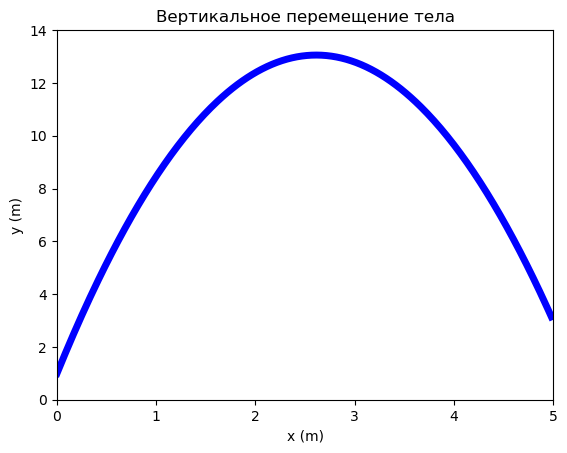

In [142]:
plt.figure()
plt.plot(s_x_list,s_y_list,'b-', lw=5)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)') # символ ; позволяет записывать несколько функций
plt.axis([0, s_end, 0, h_end+11])

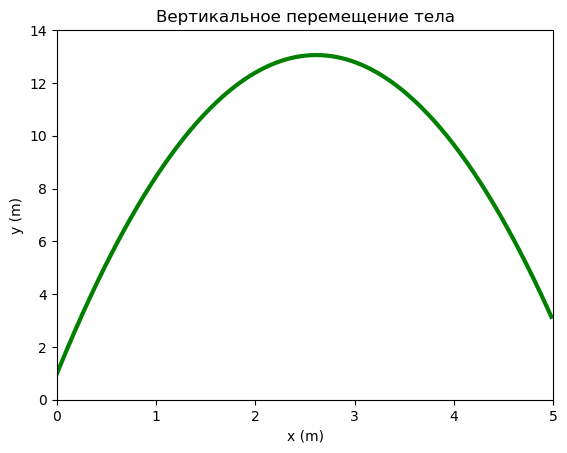

In [140]:
plt.figure()
plt.plot(s_x_array,s_y_array,color='green' , lw=3)
plt.title('Вертикальное перемещение тела')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
# альтернативный синтаксис для установки пределов по осям
plt.xlim(0, s_end)
plt.ylim(0, h_end+11);

# Задание 1.2. Определение момента времени касания телом земли

*Подход 1* (**точное решение**): 
время касания телом земли находим как точное решение уравнения $ s_y(t) = 0 $;

*Подход 2* (**приближенное решение**)

- Пострoйте последовательность $ s_y $ на временном отрезке $ [0, t_{stop}] $,  
  чтобы момент касания тела земли $ t^* $ попадал в выбранный отрезок,  
  т.е. $ t^* \in [0, t_{stop}] $.  
  Отметим, что $ t_{stop} > T $, где значение $ T $ задается в Задании 1.1.

- Найдите в построенной последовательности $ s_y $ два соседних элемента  
  последовательности, значения которых меняют знак.  
  Т. е. найти значение индекса $ k $, для которого $ s_y[k] s_y[k+1] < 0 $.  
  Это будет означать, что  
 $
  0 \in (s_y[k], s_y[k+1]).
  $

- Постройте прямую линию $ s_{lin}(t) $, проходящую через две точки  
  $ (t[k], s_y[k]) $ и $ (t[k+1], s_y[k+1]) $  
  и найти значение $ t^* \in (t[k], t[k+1]) $ из условия  
  $
  s_{lin}(t^*) = 0.
  $
  Найденное значение $ t^* $ будет соответствовать точке $ (t^*, 0) $  
  на прямой $ s_{lin}(t) $.  
  **$\color{red}\text{Приведите}$** в документе формулы для прямой $ s_{lin}(t) $  
  и для вычисления $ t^* $.

**$\color{red}\text{Сравните}$** точное решение **(Подход 1)** и приближенное решение **(Подход 2)**, вычислив относительную ошибку.

## Выполнение Задания 1.2 ##

### Рассмотрим *Подход 1* выполнения Задания 1.2. ###

Для решения алгебраического уравнения $s_{y}(t) = 0$ воспользуемся функцией `solve` из модуля `sympy`, которая предназначена для решения алгебраических уравнений и систем уравнений. Для выполнения функции `solve` предварительно с помощью функции `symbols` необходимо создать **символьную переменную**, относительно которой будет определено уравнение.


In [63]:
 t = sympy.symbols('t')
 result = sympy.solve(h_start+v0_y*t-g*t**2/2, t)
 result

[-0.0637382309488101, 3.19970039267921]

In [64]:
 t_star_exact = result[-1]
 t_star_exact

3.19970039267921

Cпецификации функций `symbols` и `solve` из модуля `sympy`. 

Функция `symbols` используется для создания символьных переменных, которые могут быть использованы в алгебраических выражениях и уравнениях

Функция `solve` используется для решения уравнений и систем уравнений относительно заданных переменных </br>
sympy.solve(expr, *symbols)

**Пример** </br>
Решим уравнение  x² - 5x + 6 = 0 

In [160]:
x = sympy.symbols('x')
solutions = sympy.solve(x**2 - 5*x + 6, x)
print(solutions)

[2, 3]


**Пример** </br>
Решим систему уравнений </br>
1.  x + y = 22 </br>
2.  x - y = 2

In [165]:
x, y = sympy.symbols('x y')
solutions = sympy.solve([x + y - 22, x - y - 2], (x, y))
print(solutions)

{x: 12, y: 10}


In [149]:
#?sympy.symbols

In [153]:
#?sympy.solve

### Рассмотрим *Подход 2* выполнения Задания 1.2 ###

- для поиска индекса $k $, для которого $s_{y}[k] s_{y}[k+1] < 0 $, используйте цикл `for` по последовательности $s_{y}$ в сочетании с `enumerate`;
- для вычисления $ t^* $ используйте построенную формулу.

In [175]:
t_stop=5.0
t_liststop= [0 + i*step for i in range(int(t_stop/0.01))]
s_ylist=[h_start+v0_y*t-g*t**2/2 for t in t_liststop]

In [177]:
for i, x in enumerate(s_ylist):
    if s_ylist[i] * s_ylist[i + 1] < 0:  
        k = i
        break  
t1, t2 = t_liststop[k], t_liststop[k+1]
s1, s2 = s_ylist[k], s_ylist[k+1]

**Уравнение прямой через две точки:**
</br>
$$ y=kx+b $$
</br>
$$ k = \frac {y2-y1} {x2-x1} $$
</br>

$$b=y1-k \cdot x1$$


In [186]:
m = (s2 - s1) / (t2 - t1)
b = s1 - m * t1
t_fall= -b / m
print(t_fall)

3.1996994995400283


In [188]:
print("разница между значениями ", " ")
print(t_star_exact - t_fall)

разница между значениями   
8.93139179058977e-7


# Задание 1.3. Построение секущей, касательной и нормали к графику функции

Построим в одной графической области:
- график траектории движения тела $(s_x(t), s_y(t))$ для $ t \in [0, T] $ из Задания 1.1;
- график секущей прямой к траектории движения тела, проходящей через начальную точку при $ t = 0 $ и конечную точку при $ t = T $;
- график касательной прямой к траектории движения тела в начальной точке при $ t = 0 $;
- график нормальной прямой к траектории движения тела в начальной точке при $ t = 0 $.
  </br>
  </br>
Построение графиков функций осуществляется по координатам точек графика. Для построения графиков прямых линий (секущая, касательная, нормаль) используйте только две точки

## Выполнение Задания 1.3 ##

Воспользуемся *векторно-параметрическим уравнением прямой* для заданной точки $ p_{start} $, лежащей на прямой, и заданного направляющего вектора $ a $  

$$
p(t) = p_{start} + at.
$$  

Направляющий вектор можно определить как $ a = p_{end} - p_{start} $, где точка $ p_{end} $ лежит на прямой и отлична от точки $ p_{start} $.  

Введем новые переменные для описания начальной точки $ p_{start} $ и конечной точки $ p_{end} $ через их координаты. Для новых переменных используем тип массив (`ndarray`) из `numpy`. Представление координат точек в виде массивов иногда эффективнее, чем представление в виде списков, для дальнейшей работы с координатами.

In [201]:
 p_start = np.array([s_x_array[0],s_y_array[0]])
 p_end = np.array([s_x_array[-1],s_y_array[-1]])
 p_start, p_end

(array([0., 1.]), array([4.98333333, 3.13994275]))

Вычислим направляющий вектор:

In [204]:
a = p_end-p_start

In [74]:
p = [p_start + a*t for t in [-1, 2]] 
p = np.array(p)

Построим график траектории движения тела и график секущей прямой в одной графической области

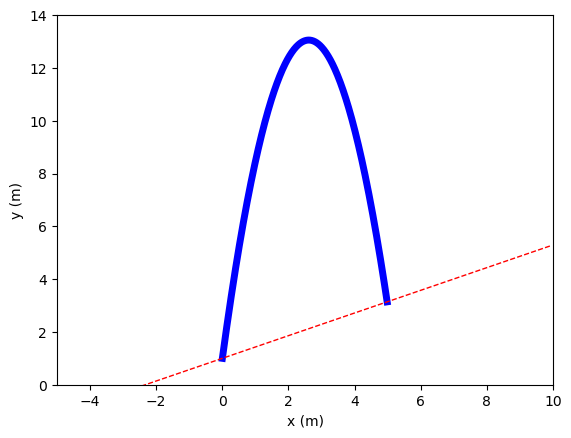

In [207]:
 fig = plt.figure()
 plt.plot(s_x_array,s_y_array,'b-',lw=5)
 plt.plot(p[:,0],p[:,1],'--',color='red',lw=1) 
 plt.xlabel('x (m)'); plt.ylabel('y (m)')
 plt.axis([-5, s_end+5, 0, h_end+11]);

Для построения касательной прямой к траектории движения тела в момент времени $t = 0$ воспользуемся уравнением прямой, по точке $p_{\text{start}}(x_{\text{start}}, y_{\text{start}})$ с угловым коэффициентом $k$:
$$
y = k(x - x_{\text{start}}) + y_{\text{start}}
$$


Угловой коэффициент $k$ = производной $s'(t)$ в точке $t=0$

Нормальная прямая является перпендикулярной касательной и проходит через точку $p_{\text{start}}$. Когда две прямые перпендикулярны, произведение их угловых коэффициентов = -1

Уравнение нормальной прямой
$$
y = k_{\text{normali}} (x - x_{\text{start}}) + y_{\text{start}}
$$

In [223]:
s_difx=sympy.diff(s_x, t) #Вычисление производной
s_dify=sympy.diff(s_y, t) #Вычисление производной
k=s_dify.subs(t,0)/s_difx.subs(t,0) #Вычисление углового коэффициента; k — это угловой коэффициент в начале движения (t=0)
y_kasstart = np.array([s_x_array[0],s_y_array[0]]) #начальная точка касательной линии 
y_kasend = np.array([s_x_array[0]+1,k+s_y_array[0]]) #конечная точка касательной линии, где x увеличивается на 1
y_kas=[y_kasstart+ (y_kasend-y_kasstart)*t for t in [-1, 2]]
y_kas = np.array(y_kas)
#y_kas — список точек на касательной линии для значений t = -1 и t = 2. 
#Каждая точка определяется линейной интерполяцией между начальной и конечной точками
y_norstart = np.array([s_x_array[0],s_y_array[0]]) #начальная точка нормали (та же, что и у касательной). 
y_norend = np.array([s_x_array[0]+1,-1/k+s_y_array[0]])
y_nor=[y_norstart+ (y_norend-y_norstart)*t for t in [-6, 10]]
y_nor = np.array(y_nor)

In [ ]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1) 
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11]);
plt.plot(y_kas[:,0], y_kas[:,1], color='orange', lw=3)
plt.plot(y_nor[:,0],y_nor[:,1],color='green',lw=3)

(-5.0, 10.0, 0.0, 14.0)

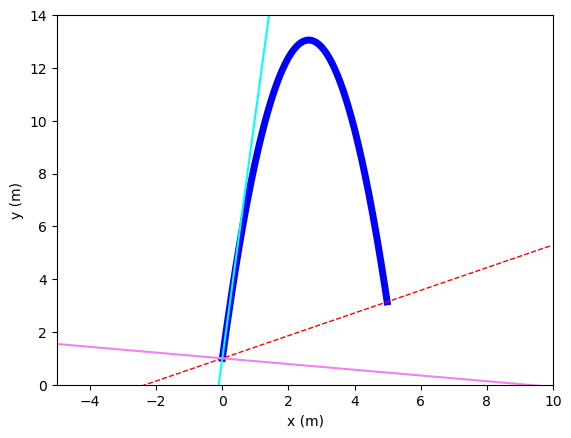

In [231]:
fig = plt.figure()
plt.plot(s_x_array,s_y_array,'b-',lw=5)
plt.plot(p[:,0],p[:,1],'--',color='red',lw=1)
plt.plot(y_kas[:,0], y_kas[:,1], color='cyan')
plt.plot(y_nor[:,0],y_nor[:,1],color='violet')
plt.xlabel('x (m)'); plt.ylabel('y (m)')
plt.axis([-5, s_end+5, 0, h_end+11])

# Задание 1.4. Построение графиков функций

4. Роза

а) полярная система координат

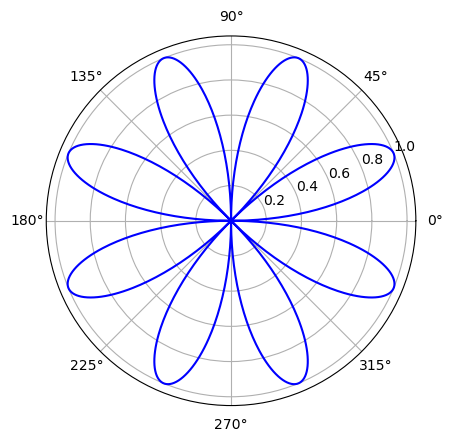

In [252]:
plt.figure()
plt.axes(projection='polar')
angle = np.arange(-np.pi, np.pi, 0.005)
k = 2
r = a * np.sin(2 * k * angle)
plt.plot(phi + (r < 0) * np.pi, abs(r), 'blue')

In [ ]:
 б) декартовая система

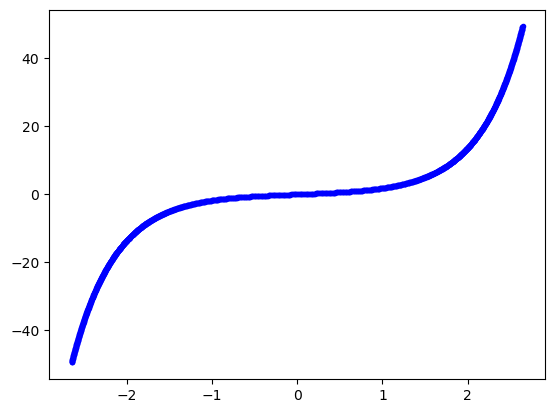

In [248]:
t = np.arange(-7, 7, 0.01)
x = np.log(t + np.sqrt(t**2 + 1))
y = t * np.sqrt(t**2 + 1)
plt.figure()
plt.plot(x, y, 'b.')